# Working with complicated dataset

Your name:

### Question 1

blast_results: https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv

Read in the data from the csv file above. Skip all the comment lines, create a header for the dataframe based on the fields list in the comment line that starts with **# Fields:**. Drop the first column `query acc.ver`. Set the `subject acc.ver` as the index of the dataframe. The last column of the dataframe should be `publications`. Show the first five rows of the resulting dataframe.

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

blast_data = pd.read_csv("https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv",
                         header = 6,
                         usecols = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         index_col = 0,
                         names = ['subject acc.ver', '% identity', 'alignment length', 'mismatches', 'gap opens', 'q. start', 'q. end', 's. start', 's. end', 'evalue', 'bit score', '% positives', 'bonds', 'publications'],
                         thousands = ',')
blast_data.head()

,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications
subject acc.ver,,,,,,,,,,,,,
NP_904328.1,100.000,318,0,0,1,318,1,318,0,629,100.00,1487,9
AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.00,17947,47
YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100.00,12106,13
ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,2319,41
AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.00,18964,3


### Question 2
What is the average number of publications?

In [97]:
blast_data['publications'] = pd.to_numeric(blast_data['publications'], errors = 'coerce')
blast_data['publications'].mean()

26.989690721649485

### Question 3
List the `subject acc.ver` that has over 15,000 bonds.

In [98]:
blast_data['bonds'] = pd.to_numeric(blast_data['bonds'], errors = 'coerce')
blast_data[blast_data['bonds'] > 15000].reset_index()['subject acc.ver']

,subject acc.ver
0,AGK29621.1
1,AHG32084.1
2,6G2J_H
3,YP_002791042.1
4,AGK29634.1
5,0806162F
6,YP_009112408.1
7,YP_001876469.1
8,YP_009092269.1
9,AHG32149.1


### Question 4
Create a plot that shows the correlation between `% identity` and `% positives`.

Text(0.5, 1.0, 'Strong positive correlation between % identity and % positive')

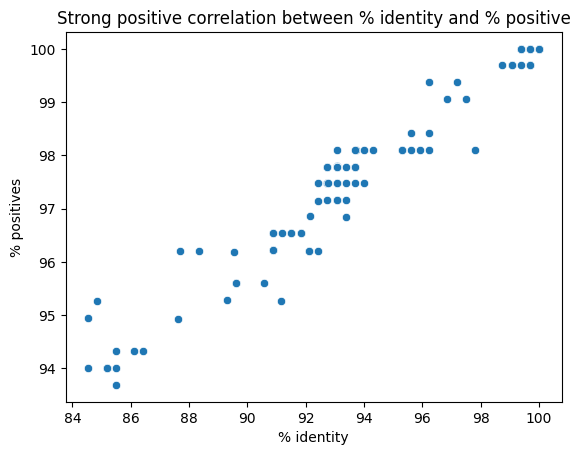

In [99]:
blast_data['% identity'] = pd.to_numeric(blast_data['% identity'], errors = 'coerce')
blast_data['% positives'] = pd.to_numeric(blast_data['% positives'], errors = 'coerce')

sns.scatterplot(data = blast_data,
                x = '% identity',
                y = '% positives')
plt.title('Strong positive correlation between % identity and % positive')

### Question  5
Add a column `Protein source` to the dataframe from Question 1 based on the data in this csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv. Merge the data when the `subject acc.ver` from the dataframe equals to `Protein` in the csv file. Entries without a matching protein will have `NA` as `Protein source`.

In [100]:
protein_source = pd.read_csv('https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv',
                             usecols = [1, 2])

blast_data = pd.merge(blast_data.reset_index(), protein_source, how = 'left', left_on = 'subject acc.ver', right_on = 'Protein').drop('Protein', axis = 1).rename(columns = {'Source':'Protein source'})
blast_data = blast_data.set_index('subject acc.ver')
blast_data

,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications,Protein source
subject acc.ver,,,,,,,,,,,,,,
NP_904328.1,100.000,318,0,0,1,318,1,318,0,629,100.00,1487,9.0,RefSeq
AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.00,17947,47.0,NaN
YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100.00,12106,13.0,GenPept
ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,2319,41.0,NaN
AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.00,18964,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ABX45285.1,92.767,318,23,0,1,318,1,318,0,551,97.48,17348,6.0,NaN
ASP44815.1,93.375,317,21,0,1,317,1,317,0,551,96.85,7105,19.0,NaN
YP_009414156.1,84.543,317,49,0,1,317,1,317,0,551,94.01,18940,37.0,GenPept
